In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "5"

from PIL import Image
import torch

from clip_text_decoder.model import ImageCaptionInferenceModel

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
ckpt_path = '/data1/ckdusdn03/clip-text-decoder/lightning_logs/version_3/model.pt'
ckpt = torch.load(ckpt_path)

In [4]:
from clip_text_decoder.model import ImageCaptionInferenceModel

model = ImageCaptionInferenceModel.load("/data1/ckdusdn03/clip-text-decoder/lightning_logs/version_3/model.pt").to(device)
# Load image and get predictions like above...

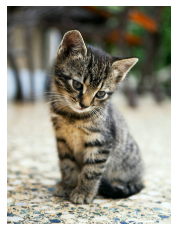

In [5]:
image = Image.open("imgs/cat.jpeg")
import matplotlib.pyplot as plt
plt.imshow(image)
plt.axis('off')
plt.show()

In [6]:
caption = model(image, beam_size=1)

In [7]:
caption

'A cat is standing on a concrete floor.'

In [46]:
x1 = torch.load("x1_text_feat.pt")

In [47]:
x1.shape

torch.Size([64, 1024])

In [48]:
x1 = x1[:, :512]
x1.shape

torch.Size([64, 512])

In [49]:
idx = 0
caption = model(image, beam_size=1, encoded=x1[idx:idx+1])

In [50]:
# make a txt file
with open("caption.txt", "w") as f:
    for i in range(8):
        caption = model(image, beam_size=1, encoded=x1[i:i+1])
        f.write(caption + "\n")